

# Project: Investigate a Dataset - [No-show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program 'Bolsa Família'.

●  the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up. 


### Project walkthrough:
*data loading

*data investigation

*data cleaning

*data explotation by break it down into small qustions such as:

1:the relation between sms status and show in (+ve appointment status)

2:the relation between age and show in

3:the relation between gender and show in

4:the relation between scholarship status and show in

*limitations
*conclusin


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling






In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()
#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### data investigation

In [4]:
df.info()
#we use info function to produce a brief show about our data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### some columns have odd name so are going to rename it

In [5]:
df.rename(columns={'No-show':'no_show','Hipertension':'Hypertension'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Cleaning

### ther are some duplicates on patient id and no show columns ,so we are going to   drop it

In [6]:
df.drop_duplicates(['PatientId','no_show'],inplace=True)
df.shape

(71817, 14)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181700e+04,7.181700e+04,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,1.466294e+14,5.666495e+06,36.526978,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,2.544927e+14,7.313144e+04,23.378518,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175978e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189717e+13,5.672884e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716568e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### here is an age cell less than 0,so we are going to drop it

In [8]:
df.drop(index=99832,axis=0,inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis






# according to sms status

### here we are going to creat  a function that store a realationship between no_show and sms status

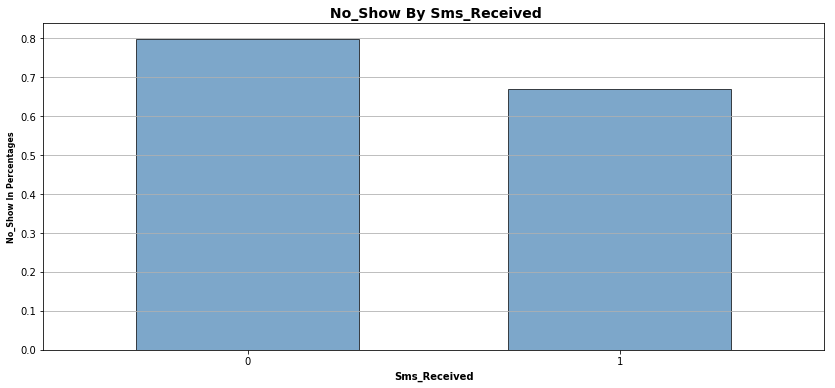

In [17]:
attend_rate(df, 'SMS_received', 'no_show')

### it sound that sms has no impact on going to the appointment 

# according to age

In [22]:
#we are going to dived no_show col into two groups
show=df.no_show ==1
noshow=df.no_show ==0
#df[show].count(),df[noshow].count()

In [25]:
#import seaborn as sb
#function set
#def percent_attendance(df,sho,xvar,att):
   # sb.barplot(data=df, x=xvar, y=sho)
    #plt.title(att)
    #plt.xlabel(xvar)
    #plt.ylabel("portion of attendece")

In [26]:
#percent_attendance(df,'no_show','Age','attend.according to age status')

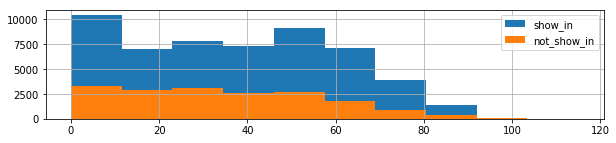

In [27]:
df['Age'][show].hist(figsize=(10,2),label='show_in');
df['Age'][noshow].hist(figsize=(10,2),label='not_show_in');
plt.title('attendamce acc to age')
plt.xlabel('age')

plt.legend();

### it sounds that very young patients have more attendance rate than old ,it  looks like mothers have commitment towards their children 

# according to gender

In [14]:
def attend_rate(df, grpVar, yVar=None, color='steelblue',title=None, ylabel=None, rotation=None, figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color, alpha=alpha)
    plt.title(f' {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(f'{grpVar}'.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'{yVar} in Percentages'.title(), fontsize = 8, weight='bold')
    plt.xticks(rotation=rotation)
    plt.grid(axis='y')

In [15]:
df.no_show = df.no_show.map(dict(Yes=0, No=1))

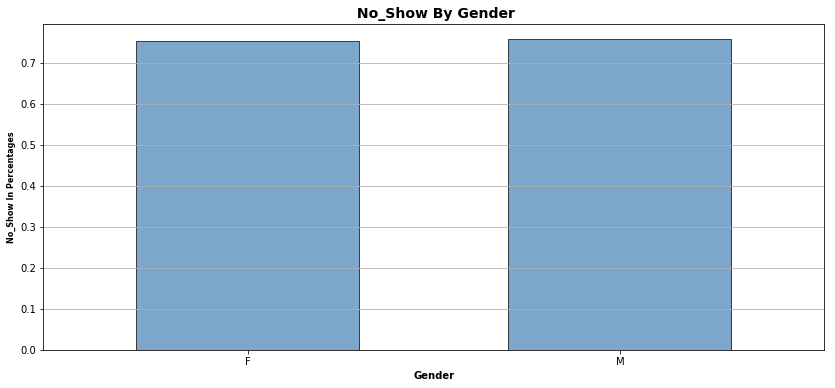

In [16]:
attend_rate(df, 'Gender', 'no_show')

In [ ]:
df['Gender'].value_counts()


#### wow ! we have females two times males

## it sound that males and females have the same rate of attendance according their numbers

# according to Scholarship status

In [19]:
df.Scholarship.value_counts()

0    64955
1     6861
Name: Scholarship, dtype: int64

#### people who has no Scholarship more than who has

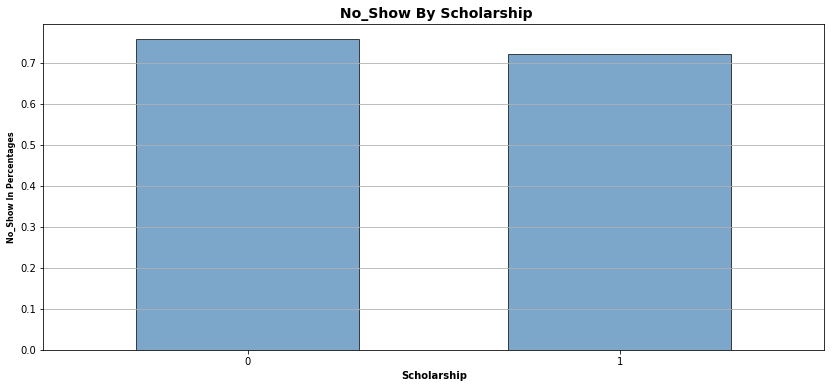

In [18]:
#here we are going to return attend_tate function to plot scholorship status
attend_rate(df, 'Scholarship', 'no_show')

### it sound that 'Scholarship status has no direct effect on patient`s decision to go


<a id='conclusions'></a>
## Conclusions
1:pateints (0:8) age have the greatest attendance rate,then pateints from 45 to 55 

2:Scholarship status has no direct effect on patient discion to go;

3:number of patient showig in after receiving sms is lower than who did not  receive any sms that means we need to revise sms policy


# limitations:
ther was a cell in age column =  -1 so i have to drop it 

if we have the distance between patient hous and hospital we could do more usful analysis and better results



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])